# 1D-signal distortion
This notebook contains a few experiments on the distortion of 1D-signals. The distortion is obtained at the level of the Fourier/Wavelet space by addin IID Gaussian random variables.

### Loading Data

In [1]:
import pandas as pd
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

Text(0, 0.5, 'Temperature')

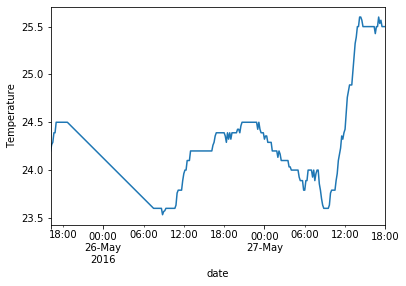

In [2]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)
signal = data_A.T1[-300:]
signal.plot().set_ylabel('Temperature')

## Fourier and DFT
You can also try to normalize using `min_max_normalization` in `tsmall.preprocessing`.

In [3]:
a = signal.values  # obtain np.array
A = rfft(a)  # computing Fourier transform
freq = fftfreq(a.shape[-1]//2 + 1)

### Inverse of Fourier transform

In [5]:
# checking the inverse of ftt
isignal = irfft(A)
l = len(A)

perturbed_A = A + np.concatenate((np.zeros(l//3), np.random.normal(0, 1, size=l-l//3)), axis=0)
perturbed_signal = irfft(perturbed_A)

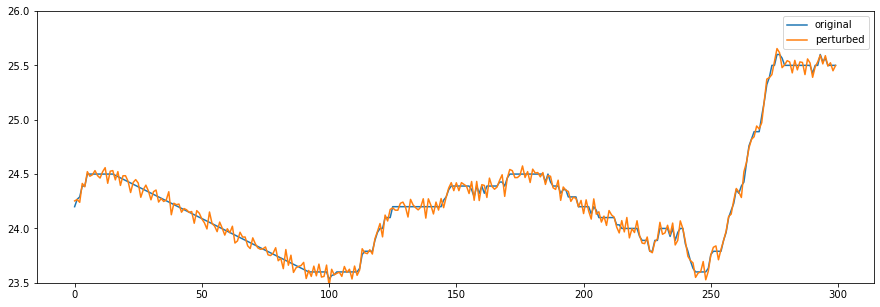

In [6]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(isignal, label='original')
ax = plt.plot(perturbed_signal, label='perturbed')
plt.legend()

## Wavelets

In [7]:
import pywt

signal = data_A.T2[-1000:-700].values
cA, cD = pywt.dwt(signal, 'db2')     # decomposition

### Inverse IDWT

In [8]:
# perturbation
perturbed_cA = cA + np.random.normal(0, 0.2, size=len(cA)) # quasi-local perturbations
perturbed_cD = cD + np.random.normal(0, 0, size=len(cD)) # small local perturbations

perturbed_signal = pywt.idwt(perturbed_cA, perturbed_cD, 'db2')

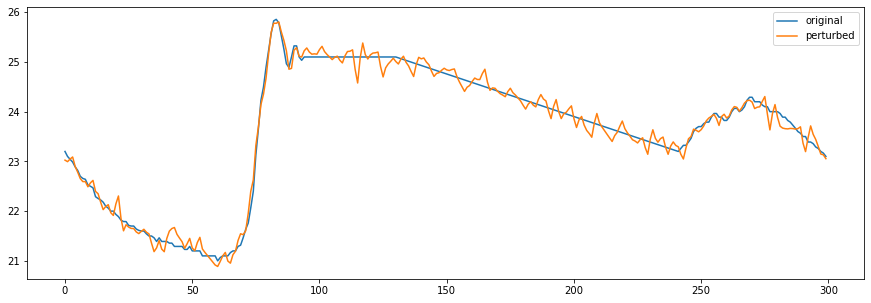

In [9]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
#plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(signal, label='original')
ax = plt.plot(perturbed_signal, label='perturbed')
plt.legend()

# using tsmall.augment

In [10]:
from tsmall import *

In [11]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)
signal = data_A.T1[-500:-400].values

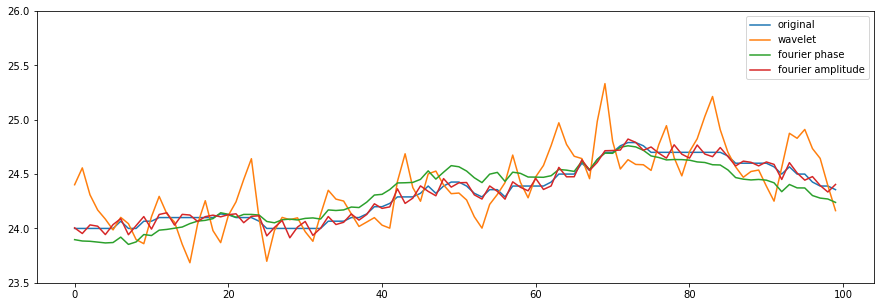

In [18]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(signal, label='original')
ax = plt.plot(signal_distortion(signal, sigma=0.3, method='wavelet'), label='wavelet')
ax = plt.plot(signal_distortion(signal, sigma=0.23, method='fourier1'), label='fourier phase')
ax = plt.plot(signal_distortion(signal, sigma=1, method='fourier2'), label='fourier amplitude')
plt.legend()

## data augmentaton on appliances

In [15]:
from tsmall import *

In [28]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)
signal = data_A.Appliances[-500:].values

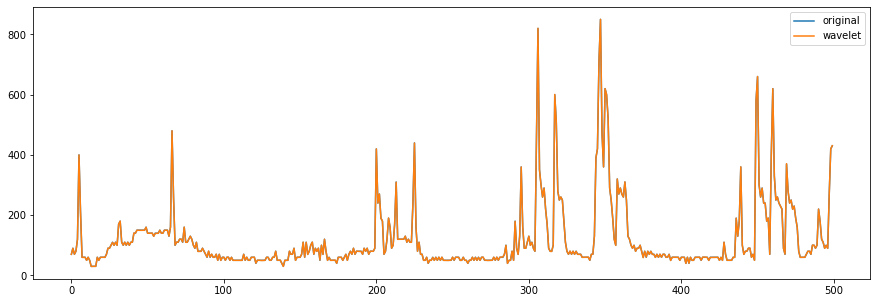

In [39]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=1)
#plt.setp(ax, ylim=[23.5,26])
ax = plt.plot(signal, label='original')
ax = plt.plot(signal_distortion(signal, sigma=0.4, method='wavelet'), label='wavelet')
#ax = plt.plot(signal_distortion(signal, sigma=0.15, method='fourier1'), label='fourier phase')
#ax = plt.plot(signal_distortion(signal, sigma=0.2, method='fourier2'), label='fourier amplitude')
plt.legend()